1) The tips.csv dataset contains data on tips collected from a restaurant.

In [1]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

tips = Table.read_table('Data/Data/tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for
males overlaid with a histogram of tips for females. Discuss what you found.

In [2]:
mean_tip = tips.select('sex','tip').group('sex', np.mean)
mean_tip

sex,tip mean
Female,2.83345
Male,3.08962


C:\Users\C20Kelly.Grier\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


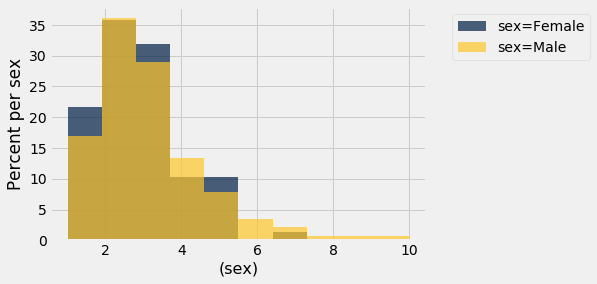

In [3]:
tips.hist('tip', group='sex', unit = 'sex')

This histogram shows that females get more tips than males. But, the amount of tip does not largely vary by gender.

b. Repeat part a, but broken down by time.

In [13]:
mean_time = tips.select('time', 'tip').group('time', np.mean)
mean_time

time,tip mean
Dinner,3.10267
Lunch,2.72809


C:\Users\C20Kelly.Grier\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


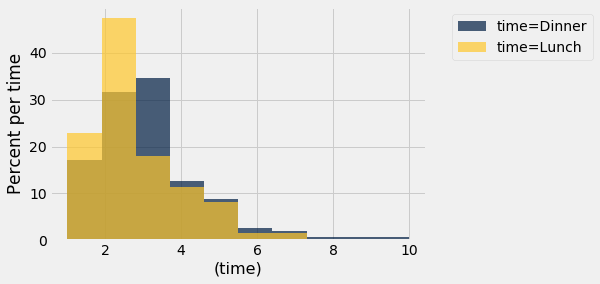

In [21]:
tips.hist('tip', group='time' , unit = 'time')

This histogram shows that people spend more money at dinner time, but that at lunch time the percent is higher on smaller bills.

2) Create a function called weekday_to_num. This function inputs a string denoting day of
the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues =
2, … Sun = 7).

In [4]:
def weekday_to_num(day):
    """
    Turn a string representing a weekday into a numerical digit for that day.
    """
    if day == 'Mon':
        return 1
    elif day == 'Tues':
        return 2
    elif day == 'Wed':
        return 3
    elif day == 'Thur':
        return 4
    elif day == 'Fri':
        return 5
    elif day == 'Sat':
        return 6
    elif day == 'Sun':
        return 7

print(weekday_to_num('Mon'))
print(weekday_to_num('Tues'))
print(weekday_to_num('Wed'))
print(weekday_to_num('Thur'))
print(weekday_to_num('Fri'))
print(weekday_to_num('Sat'))
print(weekday_to_num('Sun'))

1
2
3
4
5
6
7


3) Apply this function to the day column of tips and include the result as a new column in
tips, called weekday_num.

In [5]:
new_tips = tips.apply(weekday_to_num, 'day')
new_tips
weekday_tips = tips.with_column('weekday_num', new_tips)
weekday_tips

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


4) Create a function called est_tip. The goal of this function is to predict tip amount
based on the value of the bill (total_bill). To do this, we will look at “nearby” values
(i.e. tip, where the value of total_bill is near the value of interest.) For example, if
we want to predict the tip for total bill value of $20, we will simply look at all total bills
near $20 and average the tip amount. The input of est_tip should be the total bill
amount and the window, or the difference in total bill we would consider “nearby”. For
example, for a window of $1, we will look at all bills totaling $19 thru $21. The output of
this function will be the predicted tip amount.

In [6]:
def est_tip(bill, window):
    '''
    Predict tip amount for a bill
    '''
    return tips.where('total_bill', are.between(bill-window, bill+window)).column('tip').mean()

est_tip(20,1)

3.143333333333333

5) Apply this function to the total_bill column of tips and include the result as a new
column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip
amount.

In [8]:
bill_tip = tips.apply(est_tip, 'total_bill', 1)
tips3 = tips.with_column('estimated_tip', bill_tip)
tips3

total_bill,tip,sex,smoker,day,time,size,estimated_tip
16.99,1.01,Female,No,Sun,Dinner,2,2.80618
10.34,1.66,Male,No,Sun,Dinner,3,1.90276
21.01,3.5,Male,No,Sun,Dinner,3,3.19508
23.68,3.31,Male,No,Sun,Dinner,2,3.57681
24.59,3.61,Female,No,Sun,Dinner,4,3.6575
25.29,4.71,Male,No,Sun,Dinner,4,3.67526
8.77,2,Male,No,Sun,Dinner,2,1.86857
26.88,3.12,Male,No,Sun,Dinner,4,3.72424
15.04,1.96,Male,No,Sun,Dinner,2,2.54036
14.78,3.23,Male,No,Sun,Dinner,2,2.46231


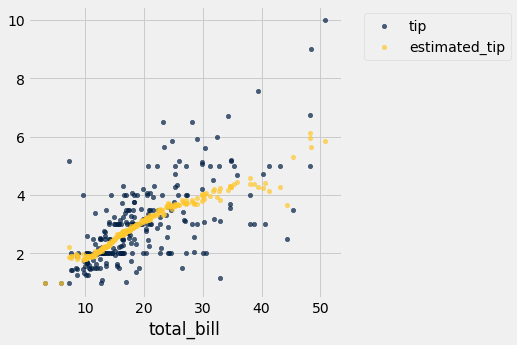

In [13]:
tips3.select('total_bill','tip','estimated_tip').scatter('total_bill')